<a href="https://colab.research.google.com/github/Andrew-s-Andersen/Statistical-Quality-Control/blob/main/SQC_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data2 = pd.read_csv('drive/My Drive/SQC613.19.csv', sep=',')

data2

,PouringTemp,TitaniumContent,Treatment,Grain,R1,R2
0,-1,-1,-1,-1,7.037,6.376
1,1,-1,-1,-1,14.707,15.219
2,-1,1,-1,-1,11.635,12.089
3,1,1,-1,-1,17.273,17.815
4,-1,-1,1,-1,10.403,10.151
5,1,-1,1,-1,4.368,4.098
6,-1,1,1,-1,9.360,9.253
7,1,1,1,-1,13.440,12.923
8,-1,-1,-1,1,8.561,8.951
9,1,-1,-1,1,16.867,17.052


In [4]:
data2.head()

,PouringTemp,TitaniumContent,Treatment,Grain,R1,R2
0,-1,-1,-1,-1,7.037,6.376
1,1,-1,-1,-1,14.707,15.219
2,-1,1,-1,-1,11.635,12.089
3,1,1,-1,-1,17.273,17.815
4,-1,-1,1,-1,10.403,10.151


In [5]:
data2=data
x1x2x3x4=data['PouringTemp'] * data['TitaniumContent'] *data['Treatment'] * data['Grain']
data2['ABCD']=x1x2x3x4
data2

,PouringTemp,TitaniumContent,Treatment,Grain,R1,R2,ABCD
0,-1,-1,-1,-1,7.037,6.376,1
1,1,-1,-1,-1,14.707,15.219,-1
2,-1,1,-1,-1,11.635,12.089,-1
3,1,1,-1,-1,17.273,17.815,1
4,-1,-1,1,-1,10.403,10.151,-1
5,1,-1,1,-1,4.368,4.098,1
6,-1,1,1,-1,9.360,9.253,1
7,1,1,1,-1,13.440,12.923,-1
8,-1,-1,-1,1,8.561,8.951,-1
9,1,-1,-1,1,16.867,17.052,1


In [6]:
data2=data2.sort_values(['ABCD'], ascending=0) #sorting in decending order of the design generator
data2=data2[0:8] #pick the first 8 obs for the first block I=ABCD
data2

,PouringTemp,TitaniumContent,Treatment,Grain,R1,R2,ABCD
0,-1,-1,-1,-1,7.037,6.376,1
3,1,1,-1,-1,17.273,17.815,1
5,1,-1,1,-1,4.368,4.098,1
6,-1,1,1,-1,9.360,9.253,1
9,1,-1,-1,1,16.867,17.052,1
10,-1,1,-1,1,13.876,13.658,1
12,-1,-1,1,1,11.846,12.337,1
15,1,1,1,1,15.653,15.053,1


In [7]:
df=data2 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 15
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PouringTemp      8 non-null      int64  
 1   TitaniumContent  8 non-null      int64  
 2   Treatment        8 non-null      int64  
 3   Grain            8 non-null      int64  
 4   R1               8 non-null      float64
 5   R2               8 non-null      float64
 6   ABCD             8 non-null      int64  
dtypes: float64(2), int64(5)
memory usage: 512.0 bytes


In [8]:
Xmain=df[['PouringTemp', 'TitaniumContent', 'Treatment', 'Grain']]
Xmain

,PouringTemp,TitaniumContent,Treatment,Grain
0,-1,-1,-1,-1
3,1,1,-1,-1
5,1,-1,1,-1
6,-1,1,1,-1
9,1,-1,-1,1
10,-1,1,-1,1
12,-1,-1,1,1
15,1,1,1,1


In [46]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4',])
# if the full model is designed then x1x2x3x4 should be added, otherwise leave it out
# xxpd['x1x2x3x4']=x1x2x3x4
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
4,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
6,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
X=xxpd[['x1','x2','x3','x4', 'x1x4']]
Y=df[['R1']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
data2['residual1']=eij

[[-0.88425]
 [ 2.71875]
 [-2.71875]
 [ 0.88425]
 [ 0.88425]
 [-2.71875]
 [ 2.71875]
 [-0.88425]]


In [14]:
X=xxpd[['x1','x2','x3','x4', 'x1x4']]
Y=df[['R2']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
data2['residual1']=eij

[[-1.219]
 [ 3.099]
 [-3.099]
 [ 1.219]
 [ 1.219]
 [-3.099]
 [ 3.099]
 [-1.219]]


In [15]:
X=xxpd[['I','x1','x2','x3','x4','x1x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.161
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.523
Time:                        05:18:40   Log-Likelihood:                -18.203
No. Observations:                   8   AIC:                             48.41
Df Residuals:                       2   BIC:                             48.88
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9552      1.665      7.180      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [16]:
res.resid

0   -1.219
1    3.099
2   -3.099
3    1.219
4    1.219
5   -3.099
6    3.099
7   -1.219
dtype: float64

In [19]:
X=xxpd[['x1','x4','x1x4']]
Y=df[['R1']]
Y=Y.to_numpy() # OLS will match index for panda dataframe so converting it to numpy array
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x1','x4','x1x4']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())
Yhat2=regr2.predict(X)
eij2=Y-Yhat2
print(eij2)
data2['residual2']=eij2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.043
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.464
Time:                        05:21:28   Log-Likelihood:                -20.978
No. Observations:                   8   AIC:                             49.96
Df Residuals:                       4   BIC:                             50.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             12.0350      1.666      7.226      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [20]:
X=xxpd[['x1','x4','x1x4']]
Y=df[['R2']]
Y=Y.to_numpy() # OLS will match index for panda dataframe so converting it to numpy array
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x1','x4','x1x4']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())
Yhat2=regr2.predict(X)
eij2=Y-Yhat2
print(eij2)
data2['residual2']=eij2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.9501
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.497
Time:                        05:21:39   Log-Likelihood:                -21.498
No. Observations:                   8   AIC:                             51.00
Df Residuals:                       4   BIC:                             51.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9552      1.777      6.726      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [21]:
data2

,PouringTemp,TitaniumContent,Treatment,Grain,R1,R2,ABCD,residual1,residual2
0,-1,-1,-1,-1,7.037,6.376,1,-1.219,-1.4385
3,1,1,-1,-1,17.273,17.815,1,3.099,6.8585
5,1,-1,1,-1,4.368,4.098,1,-3.099,-6.8585
6,-1,1,1,-1,9.360,9.253,1,1.219,1.4385
9,1,-1,-1,1,16.867,17.052,1,1.219,0.9995
10,-1,1,-1,1,13.876,13.658,1,-3.099,0.6605
12,-1,-1,1,1,11.846,12.337,1,3.099,-0.6605
15,1,1,1,1,15.653,15.053,1,-1.219,-0.9995


In [22]:
ydata0=[706, 764,780,761]
mspe=statistics.variance(ydata0)
print(mspe)

1040.9166666666667


In [23]:
beta=regr.coef_
betas=beta.flatten()
print('reduce model 1 betas,', betas)

beta2=regr2.coef_
betas2=beta2.flatten()
print('reduce model 2 betas,', betas2)

reduce model 1 betas, [ 1.54925  1.9895  -1.77     2.56975 -0.02175]
reduce model 2 betas, [ 1.54925  2.56975 -0.02175]


In [25]:
Y=df[['R1']].to_numpy()
YF=Y # there is no cetner pts in fractional design
SST = sum(Y**2) - (sum(Y))**2/len(YF)

# all SS terms of main and 2-way interactions summed for SSR
SSR=sum(betas**2) * len(Y) #there is no cpts in fractional factorial
DFm= 4
DF2w=1
DFR = DFm + DF2w 
print("SS Model (reduce model 1)", SSR, "DF=", int(DFR))
SSe=SST-SSR
DFe = len(Y)-1 - DFR
print("SS Residual",SSe, "DF=", int(DFe))

print("SS Total", SST, "DF=", len(Y)-1)

SS Model (reduce model 1) 128.7621915 DF= 5
SS Residual [29.4561205] DF= 2
SS Total [158.218312] DF= 7


In [26]:
Y=df[['R2']].to_numpy()
YF=Y # there is no cetner pts in fractional design
SST = sum(Y**2) - (sum(Y))**2/len(YF)

# all SS terms of main and 2-way interactions summed for SSR
SSR=sum(betas**2) * len(Y) #there is no cpts in fractional factorial
DFm= 4
DF2w=1
DFR = DFm + DF2w 
print("SS Model (reduce model 1)", SSR, "DF=", int(DFR))
SSe=SST-SSR
DFe = len(Y)-1 - DFR
print("SS Residual",SSe, "DF=", int(DFe))

print("SS Total", SST, "DF=", len(Y)-1)

SS Model (reduce model 1) 128.7621915 DF= 5
SS Residual [44.359048] DF= 2
SS Total [173.1212395] DF= 7


In [27]:
Y=df[['R1']].to_numpy()
YF=Y # there is no cetner pts in fractional design
#SSA= sum((betas[0:3]**2) * len(YF))
SSA= (betas[0]**2) * len(YF)
SSD= (betas[1]**2) * len(YF)
SSAD= (betas[2]**2) * len(YF)

# all SS terms summed
SSR=SSA+SSD+SSAD
print("SS Model >", SSR, "DF=", 3)
print("   SSA", SSA, "DF=1")
print('   SSD', SSD, "DF=1")
print("   SSAD", SSAD, "DF=1")
SST = sum(Y**2) - (sum(Y))**2/len(Y)

SSe2=SST-SSR
print("SS Residual error",SSe2, "DF=", len(Y)-1-3)
print("SS Total",SST, "DF=", len(Y)-1)

SS Model > 75.92948650000004 DF= 3
   SSA 19.2014045 DF=1
   SSD 31.664882000000016 DF=1
   SSAD 25.06320000000002 DF=1
SS Residual error [82.2888255] DF= 4
SS Total [158.218312] DF= 7


In [28]:
Y=df[['R2']].to_numpy()
YF=Y # there is no cetner pts in fractional design
#SSA= sum((betas[0:3]**2) * len(YF))
SSA= (betas[0]**2) * len(YF)
SSD= (betas[1]**2) * len(YF)
SSAD= (betas[2]**2) * len(YF)

# all SS terms summed
SSR=SSA+SSD+SSAD
print("SS Model >", SSR, "DF=", 3)
print("   SSA", SSA, "DF=1")
print('   SSD', SSD, "DF=1")
print("   SSAD", SSAD, "DF=1")
SST = sum(Y**2) - (sum(Y))**2/len(Y)

SSe2=SST-SSR
print("SS Residual error",SSe2, "DF=", len(Y)-1-3)
print("SS Total",SST, "DF=", len(Y)-1)

SS Model > 75.92948650000004 DF= 3
   SSA 19.2014045 DF=1
   SSD 31.664882000000016 DF=1
   SSAD 25.06320000000002 DF=1
SS Residual error [97.191753] DF= 4
SS Total [173.1212395] DF= 7


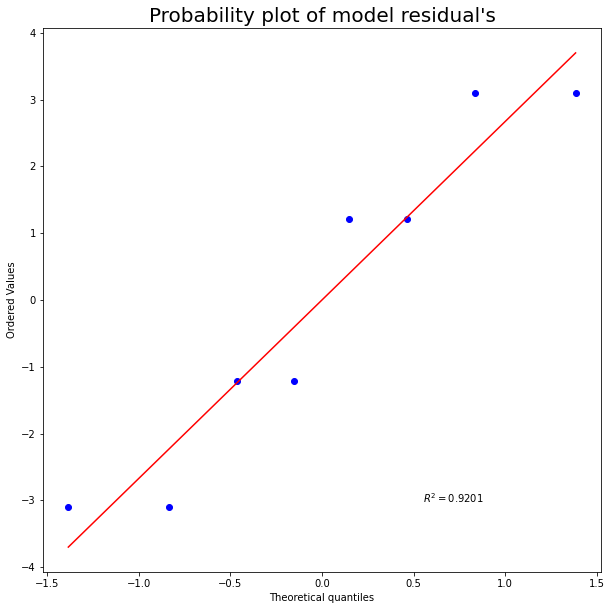

In [29]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

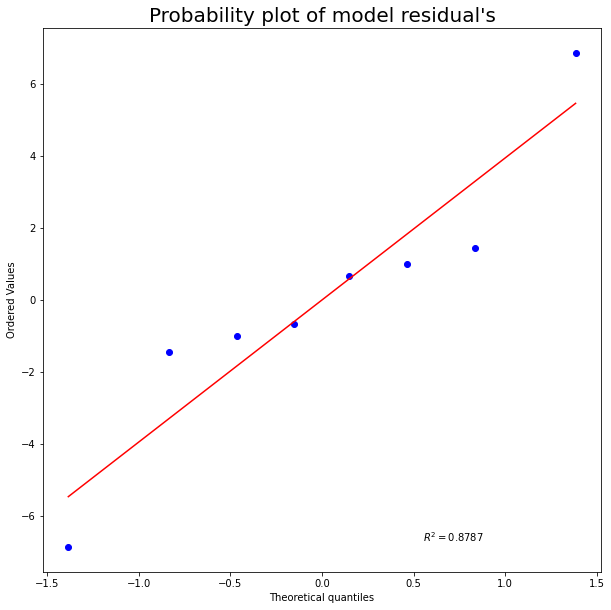

In [30]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [31]:
stats.levene(df['R1'][df['PouringTemp'] == -1],
             df['R1'][df['PouringTemp'] == 1])

LeveneResult(statistic=0.17565966217965018, pvalue=0.6897206910382039)

In [32]:
stats.levene(df['R2'][df['PouringTemp'] == -1],
             df['R2'][df['PouringTemp'] == 1])

LeveneResult(statistic=0.2336335262830052, pvalue=0.6459749101043906)

In [33]:
stats.levene(df['R1'][df['TitaniumContent'] == -1],
             df['R1'][df['TitaniumContent'] == 1])

LeveneResult(statistic=1.3970159977807162, pvalue=0.2819398224085643)

In [34]:
stats.levene(df['R2'][df['TitaniumContent'] == -1],
             df['R2'][df['TitaniumContent'] == 1])

LeveneResult(statistic=2.0480475975903434, pvalue=0.20235774146629856)

In [36]:
stats.levene(df['R1'][df['Treatment'] == -1],
             df['R1'][df['Treatment'] == 1])

LeveneResult(statistic=0.004119990911413483, pvalue=0.9509062686708443)

In [37]:
stats.levene(df['R2'][df['Treatment'] == -1],
             df['R2'][df['Treatment'] == 1])

LeveneResult(statistic=0.008459698605557873, pvalue=0.9297106585225533)

In [38]:
stats.levene(df['R1'][df['Grain'] == -1],
             df['R1'][df['Grain'] == 1])

LeveneResult(statistic=1.1921437740555372, pvalue=0.31678881234717404)

In [39]:
stats.levene(df['R2'][df['Grain'] == -1],
             df['R2'][df['Grain'] == 1])

LeveneResult(statistic=1.5820716049558043, pvalue=0.25519835250920514)

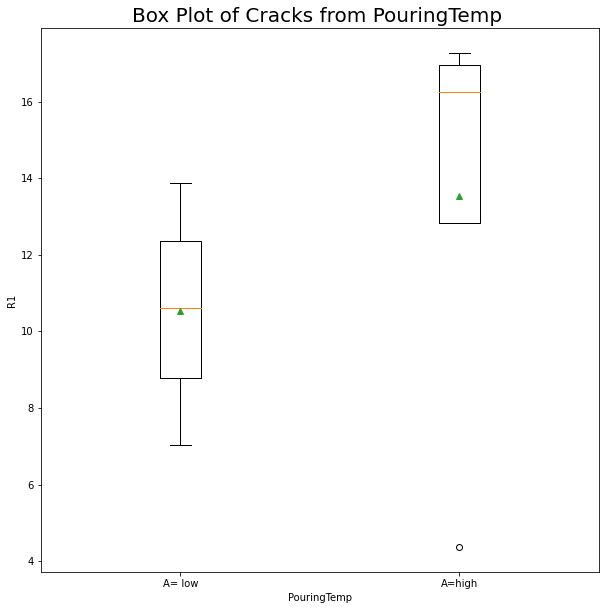

In [41]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracks from PouringTemp ", fontsize= 20)
ax.set

boxdata= [df['R1'][df['PouringTemp'] == -1],
             df['R1'][df['PouringTemp'] == 1]]


ax.boxplot(boxdata,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("PouringTemp")
plt.ylabel("R1")

plt.show()

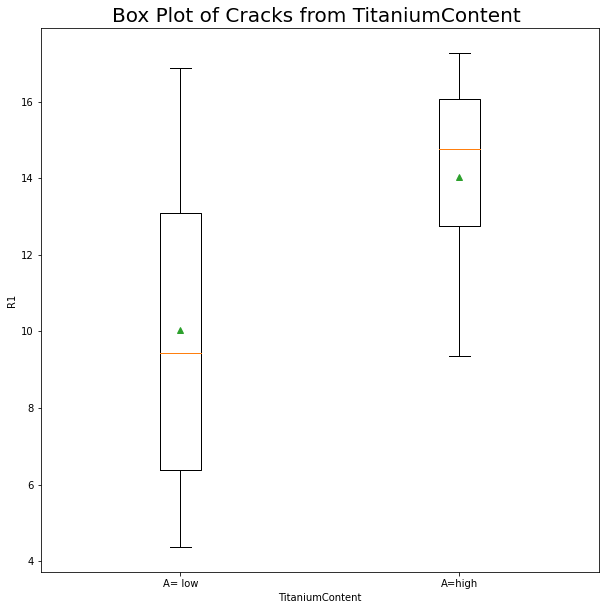

In [42]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracks from TitaniumContent ", fontsize= 20)
ax.set

boxdata= [df['R1'][df['TitaniumContent'] == -1],
             df['R1'][df['TitaniumContent'] == 1]]


ax.boxplot(boxdata,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("TitaniumContent")
plt.ylabel("R1")

plt.show()

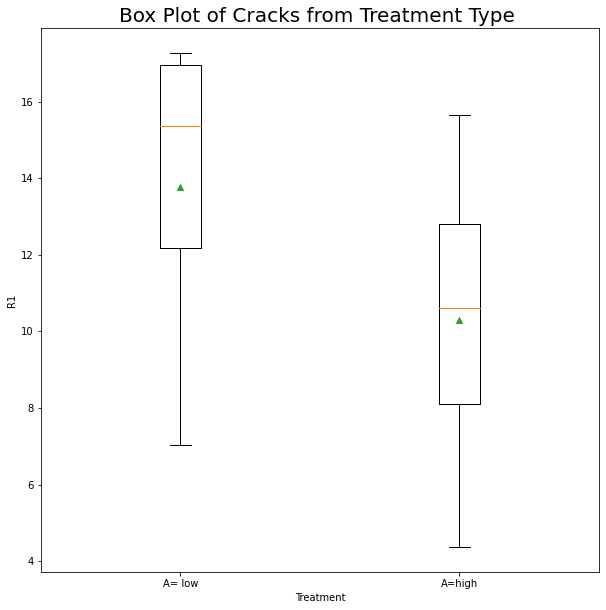

In [43]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracks from Treatment Type ", fontsize= 20)
ax.set

boxdata= [df['R1'][df['Treatment'] == -1],
             df['R1'][df['Treatment'] == 1]]


ax.boxplot(boxdata,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("Treatment")
plt.ylabel("R1")

plt.show()

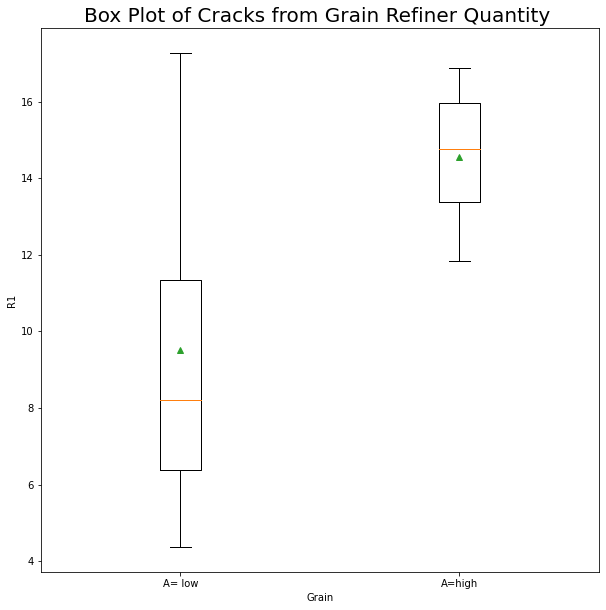

In [44]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracks from Grain Refiner Quantity ", fontsize= 20)
ax.set

boxdata= [df['R1'][df['Grain'] == -1],
             df['R1'][df['Grain'] == 1]]


ax.boxplot(boxdata,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("Grain")
plt.ylabel("R1")

plt.show()

In [49]:
model = ols('R1 ~ C(PouringTemp) + C(TitaniumContent) + C(PouringTemp):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemp),18.126221,1.0,0.716557,0.444947
C(TitaniumContent),32.176242,1.0,1.271976,0.322465
C(PouringTemp):C(TitaniumContent),6.730780,1.0,0.266078,0.633177
Residual,101.185069,4.0,NaN,NaN


In [12]:
model = ols('R1 ~ C(PouringTemp) + C(Treatment) + C(PouringTemp):C(Treatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemp),37.054613,1.0,3.284713,0.095006
C(Treatment),46.905377,1.0,4.157936,0.064092
C(PouringTemp):C(Treatment),59.193789,1.0,5.247245,0.040881
Residual,135.371137,12.0,NaN,NaN


In [13]:
model = ols('R1 ~ C(PouringTemp) + C(Grain) + C(PouringTemp):C(Grain)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemp),37.054613,1.0,1.968733,0.185924
C(Grain),15.442935,1.0,0.820492,0.382864
C(PouringTemp):C(Grain),0.168716,1.0,0.008964,0.926133
Residual,225.858652,12.0,NaN,NaN


In [14]:
model = ols('R1 ~ C(TitaniumContent) + C(Treatment) + C(TitaniumContent):C(Treatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(TitaniumContent),65.355098,1.0,4.720759,0.050547
C(Treatment),46.905377,1.0,3.388091,0.090517
C(TitaniumContent):C(Treatment),0.134139,1.0,0.009689,0.923213
Residual,166.130302,12.0,NaN,NaN


In [15]:
model = ols('R1 ~ C(TitaniumContent) + C(Grain) + C(TitaniumContent):C(Grain)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(TitaniumContent),65.355098,1.0,3.971164,0.06953
C(Grain),15.442935,1.0,0.938357,0.35182
C(TitaniumContent):C(Grain),0.237900,1.0,0.014455,0.90629
Residual,197.488982,12.0,NaN,NaN


In [16]:
model = ols('R1 ~ C(Treatment) + C(Grain) + C(Treatment):C(Grain)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Treatment),46.905377,1.0,2.604870,0.132507
C(Grain),15.442935,1.0,0.857617,0.372657
C(Treatment):C(Grain),0.095018,1.0,0.005277,0.943288
Residual,216.081586,12.0,NaN,NaN


In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.156
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.367
Time:                        01:16:18   Log-Likelihood:                -43.528
No. Observations:                  16   AIC:                             95.06
Df Residuals:                      12   BIC:                             98.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [50]:
model1 = ols('R2 ~ C(PouringTemp) + C(TitaniumContent) + C(PouringTemp):C(TitaniumContent)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemp),18.126221,1.0,0.716557,0.444947
C(TitaniumContent),32.176242,1.0,1.271976,0.322465
C(PouringTemp):C(TitaniumContent),6.730780,1.0,0.266078,0.633177
Residual,101.185069,4.0,NaN,NaN


In [51]:
model1 = ols('R2 ~ C(PouringTemp) + C(Treatment) + C(PouringTemp):C(Treatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PouringTemp),18.126221,1.0,0.716557,0.444947
C(TitaniumContent),32.176242,1.0,1.271976,0.322465
C(PouringTemp):C(TitaniumContent),6.730780,1.0,0.266078,0.633177
Residual,101.185069,4.0,NaN,NaN


In [26]:
model1 = ols('R2 ~ C(PouringTemp) + C(Grain) + C(PouringTemp):C(Grain)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Treatment),46.905377,1.0,2.604870,0.132507
C(Grain),15.442935,1.0,0.857617,0.372657
C(Treatment):C(Grain),0.095018,1.0,0.005277,0.943288
Residual,216.081586,12.0,NaN,NaN


In [27]:
model1 = ols('R2 ~ C(TitaniumContent) + C(Treatment) + C(TitaniumContent):C(Treatment)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Treatment),46.905377,1.0,2.604870,0.132507
C(Grain),15.442935,1.0,0.857617,0.372657
C(Treatment):C(Grain),0.095018,1.0,0.005277,0.943288
Residual,216.081586,12.0,NaN,NaN


In [28]:
model1 = ols('R2 ~ C(TitaniumContent) + C(Grain) + C(TitaniumContent):C(Grain)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Treatment),46.905377,1.0,2.604870,0.132507
C(Grain),15.442935,1.0,0.857617,0.372657
C(Treatment):C(Grain),0.095018,1.0,0.005277,0.943288
Residual,216.081586,12.0,NaN,NaN


In [32]:
model1 = ols('R2 ~ C(Treatment) + C(Grain) + C(Treatment):C(Grain)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Treatment),46.905377,1.0,2.604870,0.132507
C(Grain),15.442935,1.0,0.857617,0.372657
C(Treatment):C(Grain),0.095018,1.0,0.005277,0.943288
Residual,216.081586,12.0,NaN,NaN


In [33]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     R2   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.299
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.320
Time:                        01:19:41   Log-Likelihood:                -43.733
No. Observations:                  16   AIC:                             95.47
Df Residuals:                      12   BIC:                             98.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [34]:
import statsmodels.api as sm
y = data2['R1']
x = data2[['PouringTemp', 'TitaniumContent','Treatment', 'Grain']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     3.983
Date:                Fri, 14 Oct 2022   Prob (F-statistic):             0.0309
Time:                        01:22:37   Log-Likelihood:                -38.396
No. Observations:                  16   AIC:                             86.79
Df Residuals:                      11   BIC:                             90.65
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0103      0.804     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [35]:
import statsmodels.api as sm
y = data2['R2']
x = data2[['PouringTemp', 'TitaniumContent','Treatment', 'Grain']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     R2   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     3.728
Date:                Fri, 14 Oct 2022   Prob (F-statistic):             0.0374
Time:                        01:22:57   Log-Likelihood:                -39.129
No. Observations:                  16   AIC:                             88.26
Df Residuals:                      11   BIC:                             92.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.9658      0.842     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [44]:
z = data2.values
sh_0, sh_1 = z.shape
x1, x2 = np.linspace(-1,1,sh_1), np.linspace(-1, 1, sh_1)
z2 = data2[['TitaniumContent', 'Grain']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z = dict(show=True, usecolormap=True,
                                    highlightcolor = "limegreen", project_z=True))
fig.update_layout(title = 'BD vs Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(scene = dict(
                  xaxis_title = 'B',
                   yaxis_title = 'D',
                   zaxis_title = 'Y'),
                  )
fig.show()